In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets'
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML datasets
 abalone.data    DT_A_1.png      DT_C_1.pkl                mbti_1.csv
 data_1.csv      DT_B_1.png      fashion-mnist_test.csv   'ROC Curve.png'
 data_2.csv      DT-B-2-CC.png   fashion-mnist_train.csv
 diabetes2.csv   DT-B-2-XX.png   imagename.png


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing all needed libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree._tree import TREE_LEAF
from sklearn.base import clone
import random


#(A) Training

In [ ]:
#reading data1.csv
data1=pd.read_csv('data_1.csv')

#splitting into features and labels
Y= data1['fetal_health']
X= data1.drop(['fetal_health'],axis=1)

#splitting into training and testing data sets in 8:2 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=data1['fetal_health'], random_state=123)


##(A) Q1:

In [ ]:
#training data on decision tree classifier
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.82      0.82      0.82        40
           3       0.90      0.90      0.90        10

    accuracy                           0.95       290
   macro avg       0.90      0.90      0.90       290
weighted avg       0.95      0.95      0.95       290
 



Text(0.5, 1.0, 'AUC-ROC Curve')

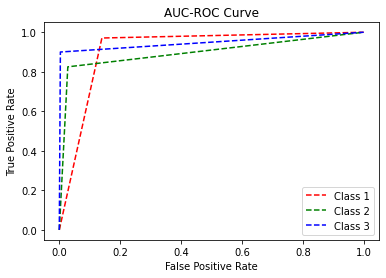

In [ ]:
#report precision, recall and accuracy on the test set.
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, labels=[1, 2, 3]),'\n')


#report AUC-ROC curve on the test set
Y_prob_pred = model.predict_proba(X_test)
fp = {}
tp = {}
n_class = 3
for i in range(n_class):    
    fp[i], tp[i], val = roc_curve(Y_test, Y_prob_pred[:,i], pos_label=i+1)
    
# plotting    
plt.plot(fp[0], tp[0], linestyle='--', color='red', label='Class 1')
plt.plot(fp[1], tp[1], linestyle='--', color='green', label='Class 2')
plt.plot(fp[2], tp[2], linestyle='--', color='blue', label='Class 3')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title("AUC-ROC Curve")
#plt.savefig('ROC Curve',dpi=300); 

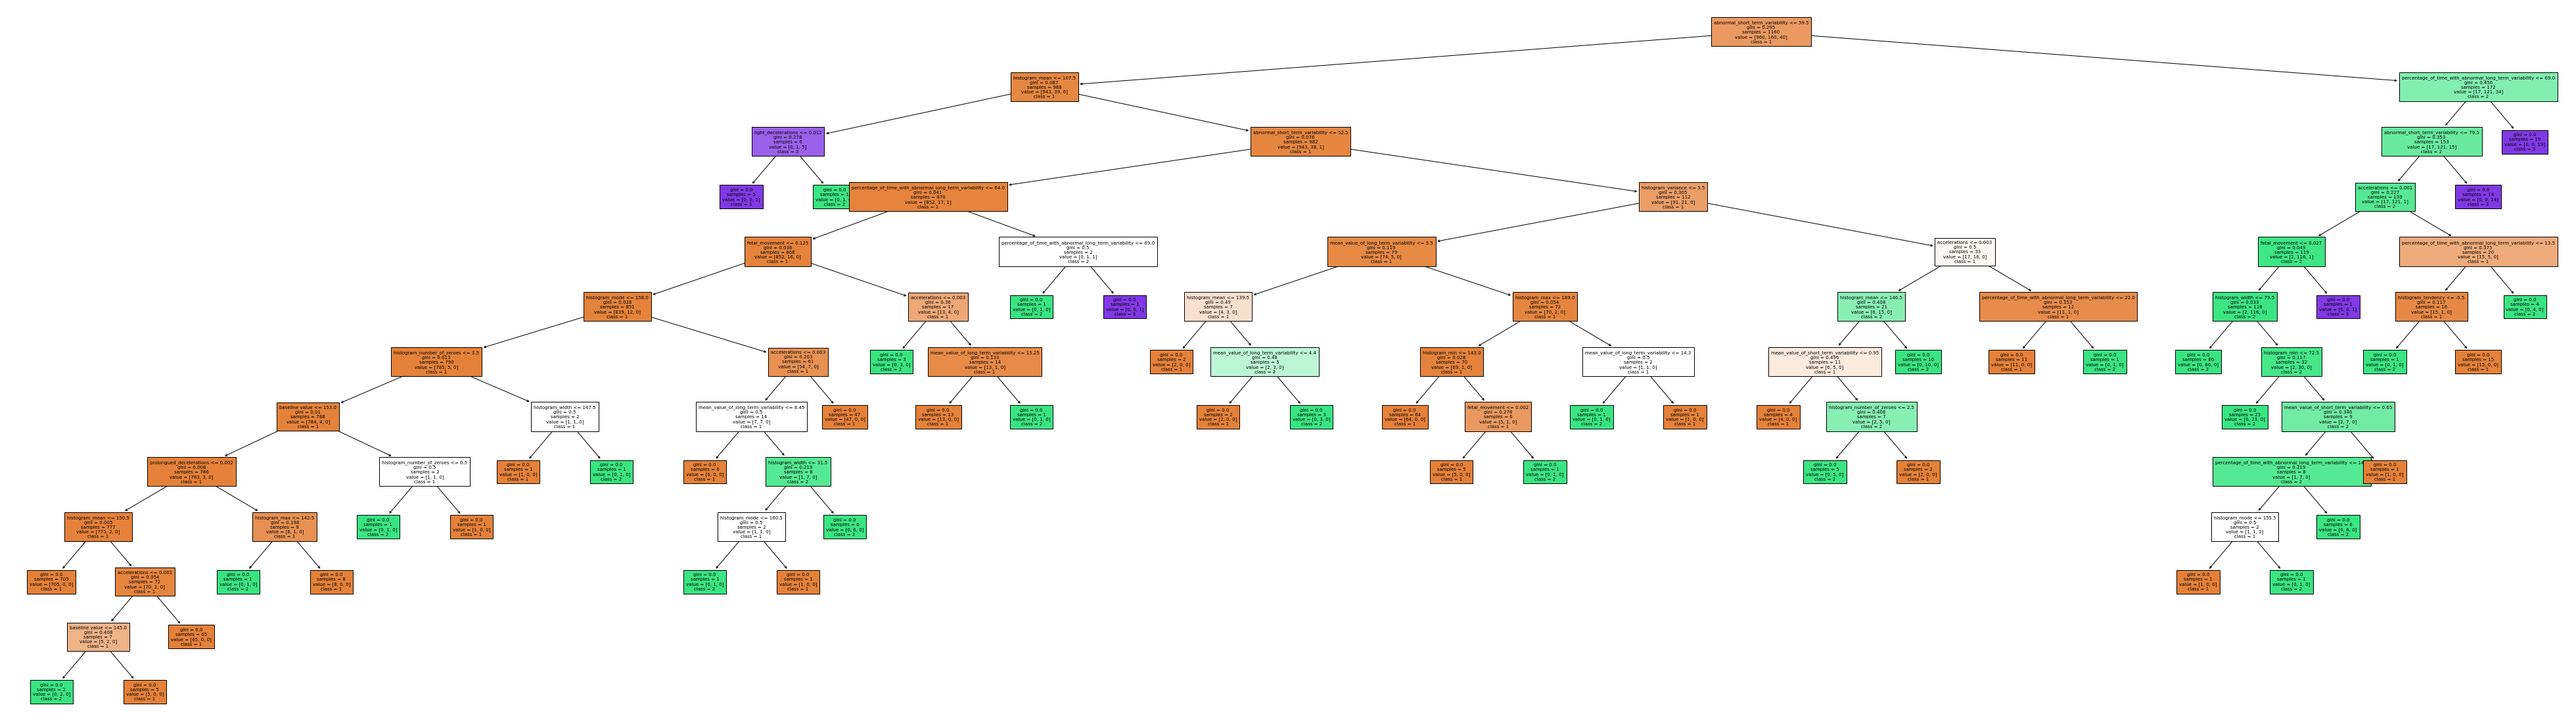

In [ ]:
#Visualize the Decision Tree (DT) and save the visualization

class_unique= data1.fetal_health.unique()
class_unique= list(map(str, class_unique))

fig, axes = plt.subplots(figsize=(70, 20))
tree.plot_tree(model,feature_names = list(data1.columns),class_names=class_unique, filled = True, fontsize=7)
fig.savefig('DT_A_1.png')

##(A) Q2:

Text(0.5, 1.0, 'Accuracy vs Depth Graph')

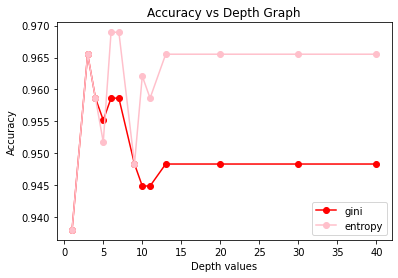

In [ ]:

#Train the Decision Tree classifier on different depths
depths = [1, 3, 4, 5, 6, 7, 9, 10, 11, 13, 20, 30, 40]
accuracies_gini = list() 
accuracies_entropy = list() 

#training for criterion ='gini'
for x in depths:
  model_dt = DecisionTreeClassifier(max_depth=x, random_state=123)
  model_dt.fit(X_train, Y_train)
  predictions = model_dt.predict(X_test)
  acc=accuracy_score(Y_test, predictions)
  accuracies_gini.append(acc)

#training for criterion ='entropy'
for x in depths:
   model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=x, random_state=123)
   model_dt.fit(X_train, Y_train)
   predictions = model_dt.predict(X_test)
   acc=accuracy_score(Y_test, predictions)
   accuracies_entropy.append(acc)

#plotting
plt.plot(depths, accuracies_gini, marker='o', color='red', label='gini')
plt.plot(depths, accuracies_entropy, marker='o', color='pink', label='entropy')
plt.xlabel('Depth values')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy vs Depth Graph")



##(A) Q3:

In [ ]:
# function to report the observations (precision, recall, accuracy and AUC-ROC curve) on given model

def print_metrics(dt_model):
  dt_model.fit(X_train, Y_train)
  predictions = dt_model.predict(X_test)

#precision, recall, accuracy 
  print(classification_report(Y_test, predictions, labels=[1, 2, 3]),'\n')

#AUC-ROC curve
  Y_prob_predictions = dt_model.predict_proba(X_test)
  fp = {}
  tp = {}
  n_class = 3
  for i in range(n_class):    
    fp[i], tp[i], val = roc_curve(Y_test, Y_prob_predictions[:,i], pos_label=i+1)
  
  # plotting    
  plt.plot(fp[0], tp[0], linestyle='--',color='red', label='Class 1')
  plt.plot(fp[1], tp[1], linestyle='--',color='green', label='Class 2')
  plt.plot(fp[2], tp[2], linestyle='--',color='blue', label='Class 3')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
  plt.title("ROC CURVE")

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       240
           2       0.90      0.88      0.89        40
           3       0.90      0.90      0.90        10

    accuracy                           0.97       290
   macro avg       0.93      0.92      0.92       290
weighted avg       0.97      0.97      0.97       290
 



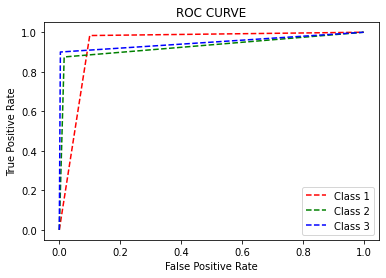

In [ ]:
#Criterion, Splitter, min samples split, max depth, min samples leaf, max features (sqrt/log2), class weight and max leaf nodes and report the observations

#Criterion, default:'gini'
dt1= DecisionTreeClassifier(criterion='entropy', random_state=123)
print_metrics(dt1)

              precision    recall  f1-score   support

           1       0.97      0.96      0.96       240
           2       0.73      0.75      0.74        40
           3       0.60      0.60      0.60        10

    accuracy                           0.92       290
   macro avg       0.77      0.77      0.77       290
weighted avg       0.92      0.92      0.92       290
 



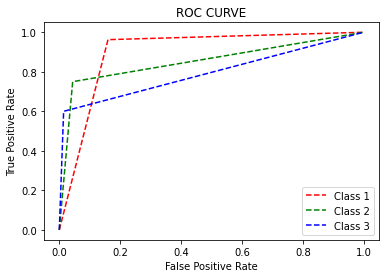

In [ ]:
#Splitter, default:'best'
dt2= DecisionTreeClassifier(splitter='random', random_state=123)
print_metrics(dt2)

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       240
           2       0.74      0.85      0.79        40
           3       0.00      0.00      0.00        10

    accuracy                           0.93       290
   macro avg       0.57      0.61      0.59       290
weighted avg       0.91      0.93      0.92       290
 

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       240
           2       0.85      0.88      0.86        40
           3       0.90      0.90      0.90        10

    accuracy                           0.96       290
   macro avg       0.91      0.92      0.91       290
weighted avg       0.96      0.96      0.96       290
 



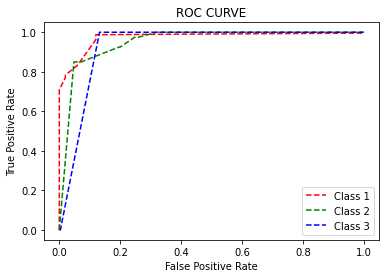

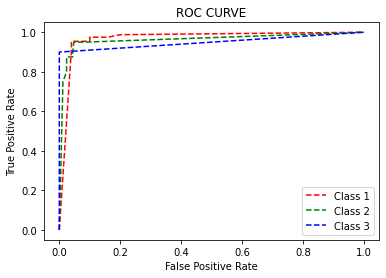

In [ ]:
#min_samples_split, default=2
dt3= DecisionTreeClassifier(min_samples_split=200, random_state=123)
print_metrics(dt3)

plt.figure(2)

dt3= DecisionTreeClassifier(min_samples_split=13, random_state=123)
print_metrics(dt3)

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       240
           2       0.89      0.82      0.86        40
           3       0.90      0.90      0.90        10

    accuracy                           0.96       290
   macro avg       0.92      0.90      0.91       290
weighted avg       0.96      0.96      0.96       290
 



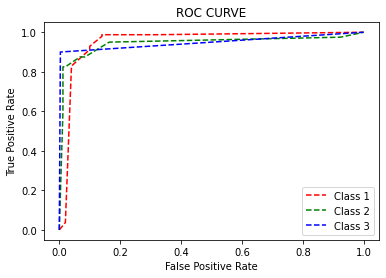

In [ ]:
#max_depth
dt4= DecisionTreeClassifier(max_depth=6, random_state=123)
print_metrics(dt4)


              precision    recall  f1-score   support

           1       0.83      1.00      0.91       240
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        10

    accuracy                           0.83       290
   macro avg       0.28      0.33      0.30       290
weighted avg       0.68      0.83      0.75       290
 



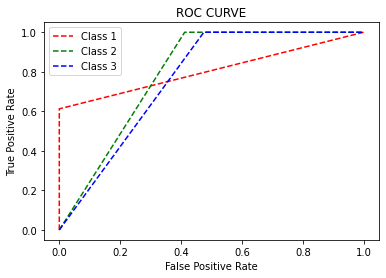

In [ ]:
#min_samples_leaf, deafult:1
dt5= DecisionTreeClassifier(min_samples_leaf=500, random_state=123)
print_metrics(dt5)

              precision    recall  f1-score   support

           1       0.98      0.93      0.96       240
           2       0.63      0.82      0.72        40
           3       0.78      0.70      0.74        10

    accuracy                           0.91       290
   macro avg       0.80      0.82      0.80       290
weighted avg       0.92      0.91      0.91       290
 



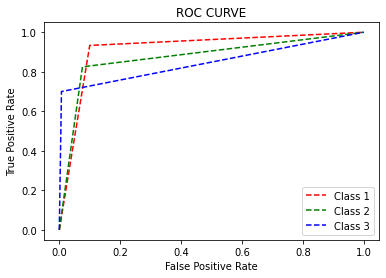

In [ ]:
#max_features, default:None
dt6= DecisionTreeClassifier(max_features='sqrt', random_state=123)
print_metrics(dt6)

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       240
           2       0.91      0.80      0.85        40
           3       0.90      0.90      0.90        10

    accuracy                           0.96       290
   macro avg       0.93      0.90      0.91       290
weighted avg       0.96      0.96      0.96       290
 



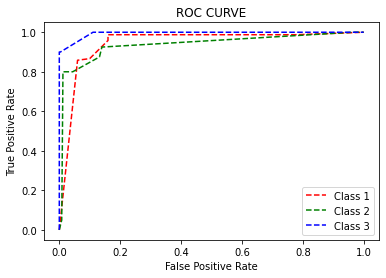

In [ ]:
#max_leaf_nodes, default:None

#for max_leaf_nodes=11
dt7= DecisionTreeClassifier(max_leaf_nodes=12, random_state=123)
print_metrics(dt7)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.82      0.82      0.82        40
           3       0.90      0.90      0.90        10

    accuracy                           0.95       290
   macro avg       0.90      0.90      0.90       290
weighted avg       0.95      0.95      0.95       290
 



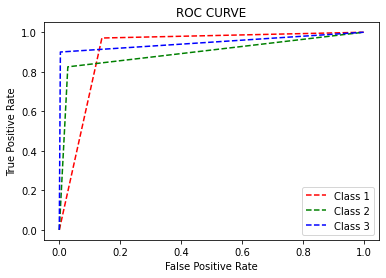

In [ ]:
#class_weight, default:None
dt8= DecisionTreeClassifier(class_weight='balanced', random_state=123)
print_metrics(dt8)

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       240
           2       0.97      0.82      0.89        40
           3       0.90      0.90      0.90        10

    accuracy                           0.97       290
   macro avg       0.95      0.91      0.93       290
weighted avg       0.97      0.97      0.97       290
 



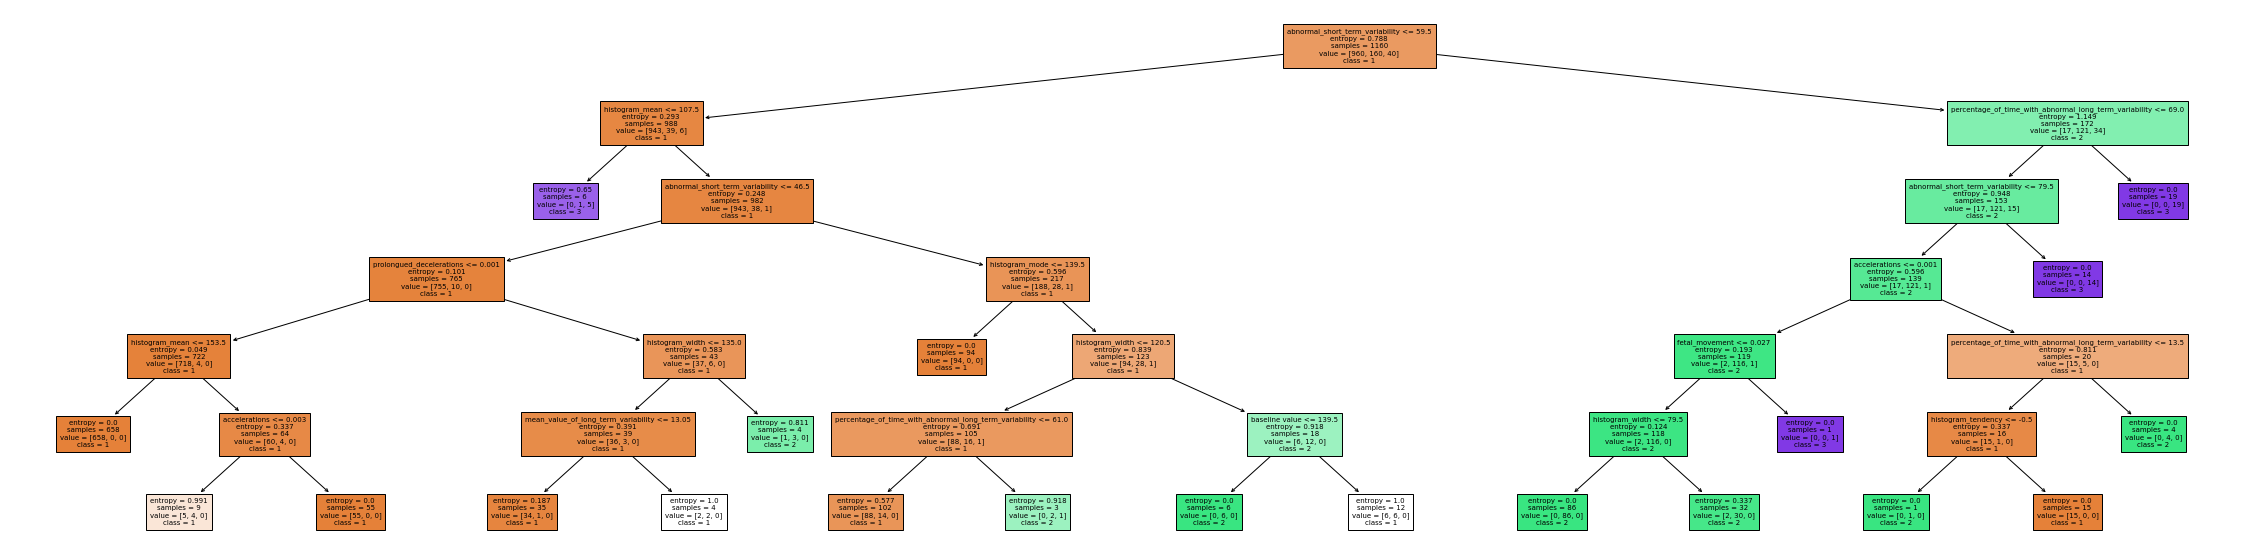

In [ ]:
#Hyperparameters Tuning 

#DT_A= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7 , max_features=None, max_leaf_nodes= 4, min_samples_leaf=15, min_samples_split=80, random_state=123, splitter='best')
DT_A= DecisionTreeClassifier(class_weight=None, criterion='entropy', min_samples_split=13, max_depth=6, random_state=123)
DT_A.fit(X_train, Y_train)

fig, axes = plt.subplots(figsize=(40, 10))
tree.plot_tree(DT_A,feature_names = list(data1.columns),class_names=class_unique, filled = True, fontsize=7)

predictions = DT_A.predict(X_test)
print(classification_report(Y_test, predictions, labels=[1, 2, 3]),'\n')

##(B)

##(B) Q1

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       240
           2       0.97      0.82      0.89        40
           3       0.90      0.90      0.90        10

    accuracy                           0.97       290
   macro avg       0.95      0.91      0.93       290
weighted avg       0.97      0.97      0.97       290
 



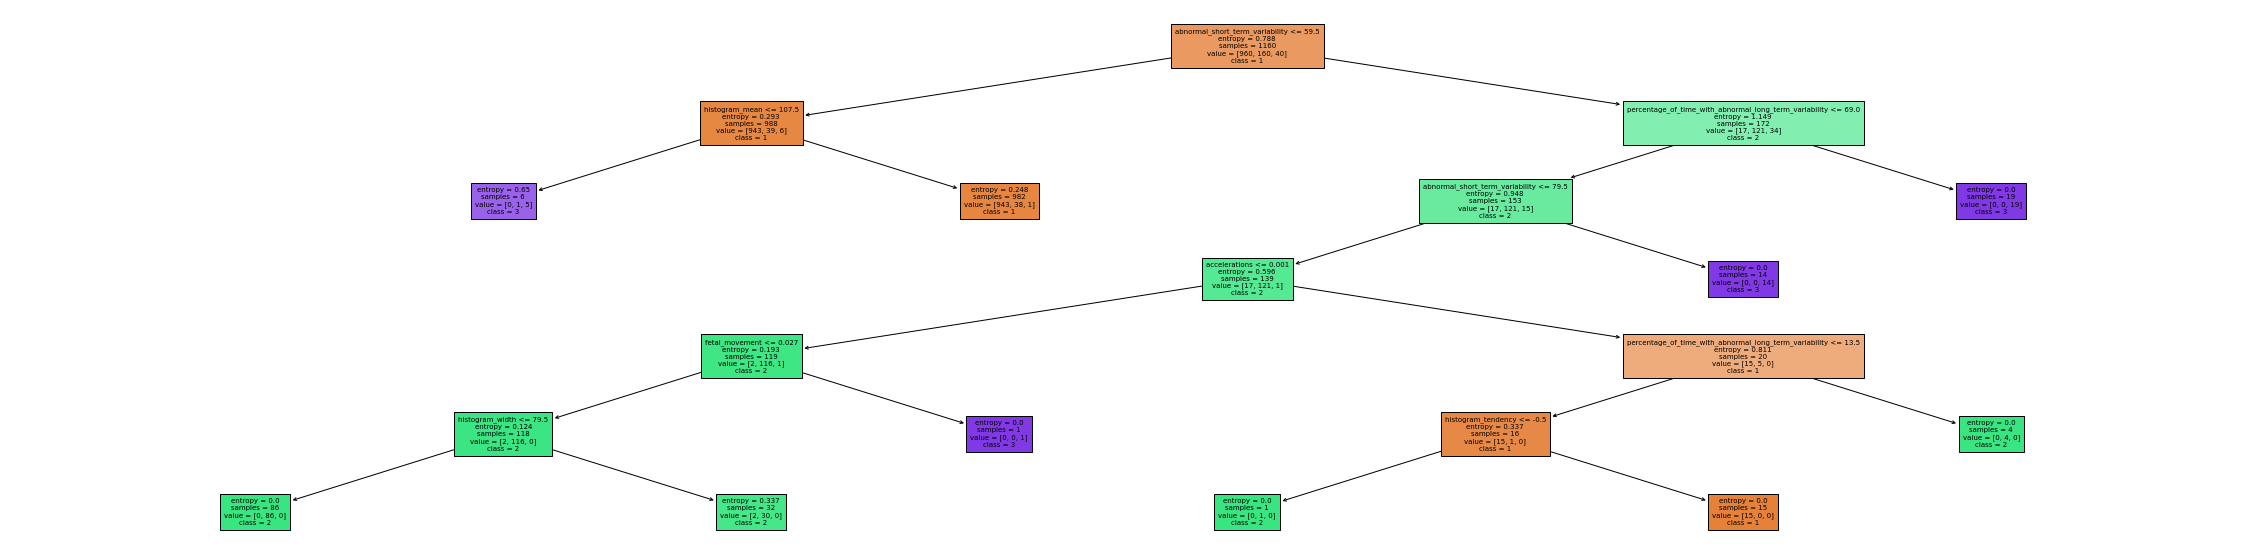

In [ ]:
#Remove a random Node
DT_B_1= clone(estimator=DT_A, safe=True)
DT_B_1.fit(X_train, Y_train)

#total no of nodes in DT_A
n_nodes = DT_B_1.tree_.node_count

#function to delete node with given ID
def delete_node(inner_tree):
     i=3
     if inner_tree.children_left[i]!=-1:
        xa= inner_tree.value[inner_tree.children_left[i]].max()
        xy= inner_tree.value[inner_tree.children_right[i]].max()
        inner_tree.children_left[i]=-1
        inner_tree.children_right[i]=-1
        if xa<xy:
            parent = py.where(inner_tree.children_right == i)
            if (len(parent[0])!=0):
                inner_tree.children_right

#remove node with random ID
delete_node(DT_B_1.tree_)

#Report precision, recall and accuracy
predictions = DT_B_1.predict(X_test)
print(classification_report(Y_test, predictions, labels=[1, 2, 3]),'\n')

#Visualize the DT_B_1
fig, axes = plt.subplots(figsize=(40, 10))
tree.plot_tree(DT_B_1,feature_names = list(data1.columns),class_names=class_unique, filled = True, fontsize=7)
fig.savefig('DT_B_1.png')

##(B) Q2

Value of Alpha after CCP:  {'ccp_alpha': 0.02258274243623068} 

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       240
           2       0.97      0.75      0.85        40
           3       0.90      0.90      0.90        10

    accuracy                           0.96       290
   macro avg       0.94      0.88      0.91       290
weighted avg       0.96      0.96      0.96       290
 



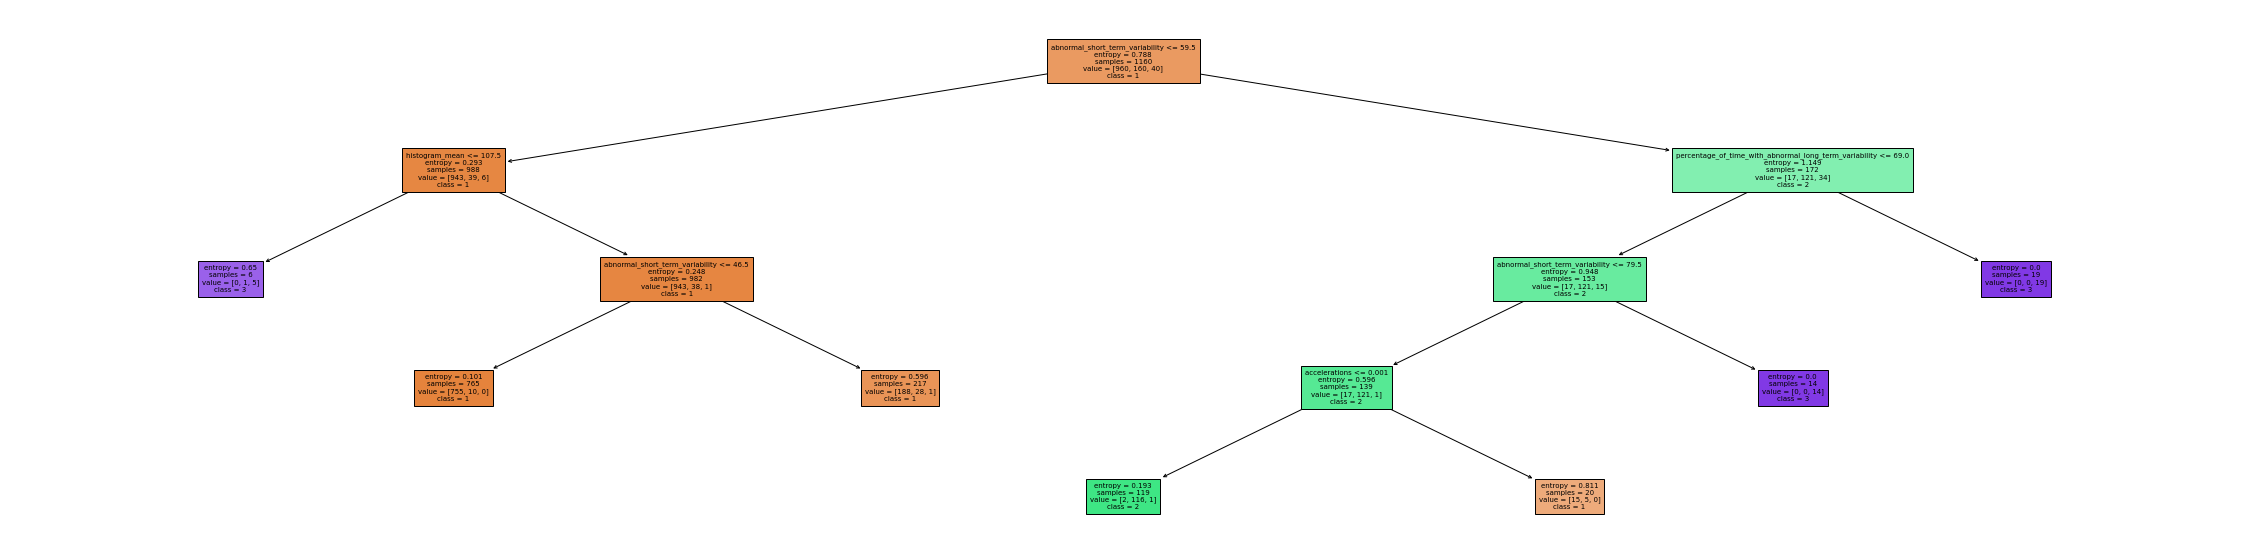

In [ ]:
#Applying the Cost Complexity pruning technique

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

path = DT_A.cost_complexity_pruning_path(X_train, Y_train)
alphas= path['ccp_alphas']
CPP_model= GridSearchCV(estimator=DT_A, scoring= make_scorer(accuracy_score), param_grid= ParameterGrid({"ccp_alpha":[[alpha] for alpha in alphas]}))
CPP_model.fit(X_train, Y_train)

#Report the value of alpha for Cost Complexity Pruning
print("Value of Alpha after CCP: ",CPP_model.best_params_,'\n')
DT_B_2_CC=CPP_model.best_estimator_

#Report precision, recall and accuracy
predictions = CPP_model.predict(X_test)
print(classification_report(Y_test, predictions, labels=[1, 2, 3]),'\n')

#Visualize the DT-B-2-CC
fig, axes = plt.subplots(figsize=(40, 10))
tree.plot_tree(DT_B_2_CC,feature_names = list(data1.columns),class_names=class_unique, filled = True, fontsize=7)
fig.savefig('DT-B-2-CC.png')

Value of Parameters after pre-pruning:  {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5} 

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       240
           2       0.87      0.82      0.85        40
           3       0.90      0.90      0.90        10

    accuracy                           0.96       290
   macro avg       0.91      0.90      0.91       290
weighted avg       0.95      0.96      0.95       290
 



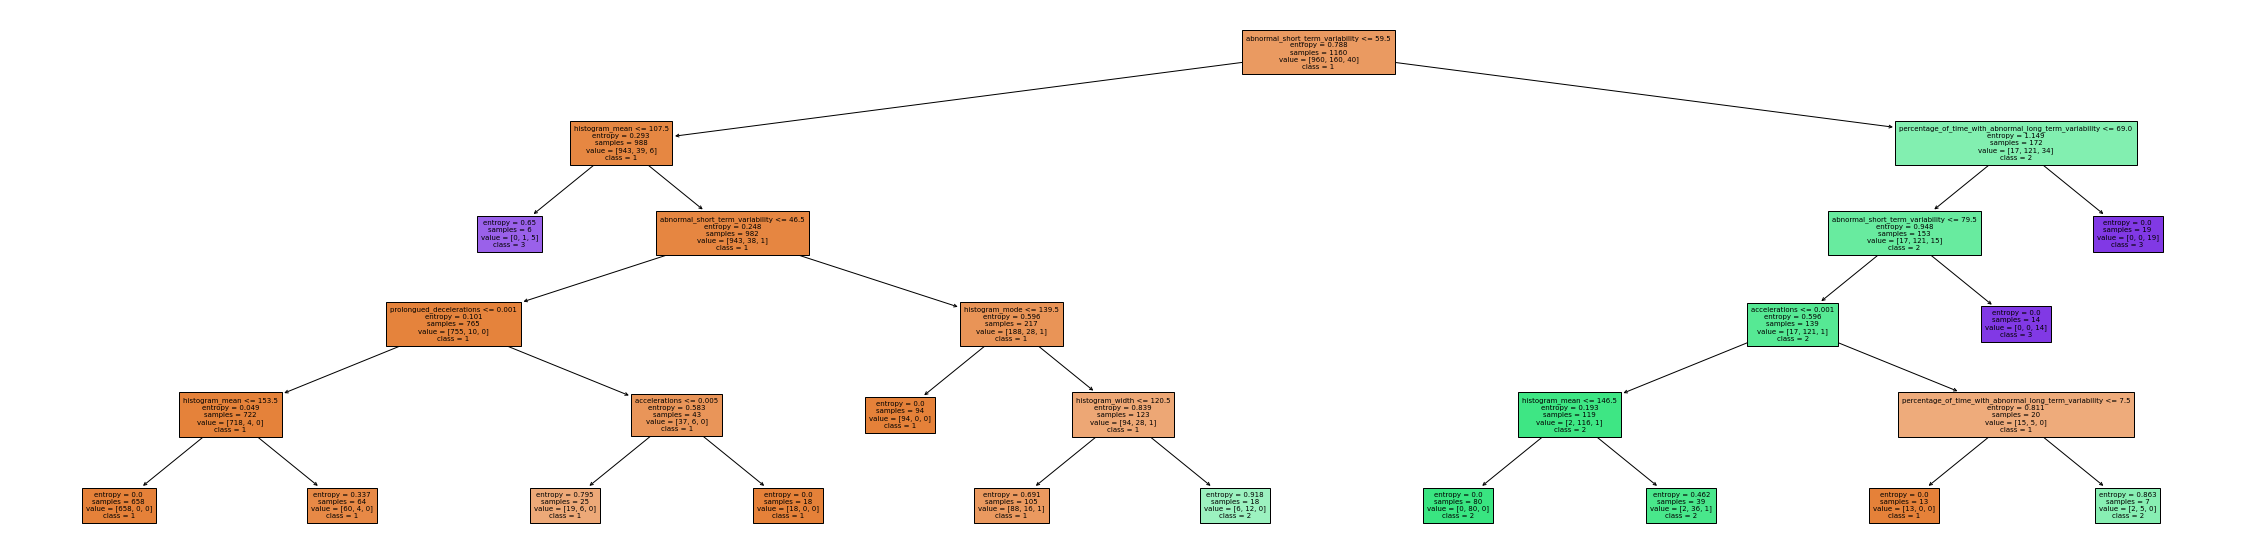

In [ ]:
#Applying pre-pruning technique using GridSearchCV

#parameters: min_samples_split, min_samples_leaf
XX_model= GridSearchCV(estimator=DT_A, scoring= make_scorer(accuracy_score), param_grid= { "max_depth":list(range(4,9)), "min_samples_split":list(range(5, 30)), "min_samples_leaf":list(range(2, 10))})

#Report parameters of second pruning technique 
XX_model.fit(X_train, Y_train)
print("Value of Parameters after pre-pruning: ",XX_model.best_params_,'\n')
DT_B_2_XX=XX_model.best_estimator_

#Report precision, recall and accuracy
predictions = XX_model.predict(X_test)
print(classification_report(Y_test, predictions, labels=[1, 2, 3]),'\n')

#Visualize the DT-B-2-XX
fig, axes = plt.subplots(figsize=(40, 10))
tree.plot_tree(DT_B_2_XX,feature_names = list(data1.columns),class_names=class_unique, filled = True, fontsize=7)
fig.savefig('DT-B-2-XX.png')

##(B) Q3:

##(C)

In [ ]:
#reading data2.csv
data2=pd.read_csv('data_2.csv')

#splitting into features and labels
Y2= data2['fetal_health']
X2= data2.drop(['fetal_health'],axis=1)

#splitting into training and testing data sets in 8:2 ratio
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, stratify=data2['fetal_health'], random_state=123)

##(C) Q1:

In [ ]:
# function to report the observations (precision, recall, accuracy and AUC-ROC curve) on given model

def print_metrics_tree(dt_model, Xtest, Ytest):
  predictions = dt_model.predict(Xtest)

#precision, recall, accuracy 
  print(classification_report(Ytest, predictions, labels=[1, 2, 3]),'\n')

#AUC-ROC curve
  Y_prob_predictions = dt_model.predict_proba(Xtest)
  fp = {}
  tp = {}
  n_class = 3
  for i in range(n_class):    
    fp[i], tp[i], val = roc_curve(Ytest, Y_prob_predictions[:,i], pos_label=i+1)
  
  # plotting 
  plt.figure()   
  plt.plot(fp[0], tp[0], linestyle='--',color='red', label='Class 1')
  plt.plot(fp[1], tp[1], linestyle='--',color='green', label='Class 2')
  plt.plot(fp[2], tp[2], linestyle='--',color='blue', label='Class 3')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')
  plt.title("ROC CURVE")

 
 The classifier DT-C-1 : 

 Performance of DT-C-1 on data_1 test set: 

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       240
           2       0.74      0.85      0.79        40
           3       0.00      0.00      0.00        10

    accuracy                           0.94       290
   macro avg       0.57      0.61      0.59       290
weighted avg       0.91      0.94      0.92       290
 

 Performance of DT-C-1 on data_2 test set: 

              precision    recall  f1-score   support

           1       0.75      0.43      0.55        92
           2       0.16      0.68      0.25        19
           3       0.00      0.00      0.00        25

    accuracy                           0.39       136
   macro avg       0.30      0.37      0.27       136
weighted avg       0.53      0.39      0.41       136
 

 The classifier DT-C-1-X : 

 Performance of DT-C-1-X on data_1 test set: 

              precision    recall  f1-s

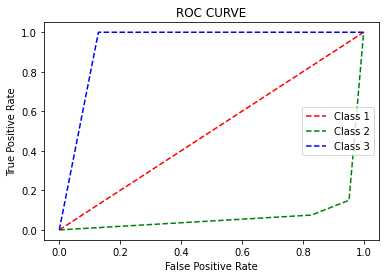

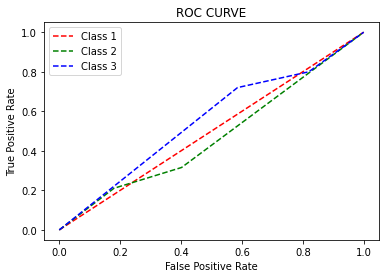

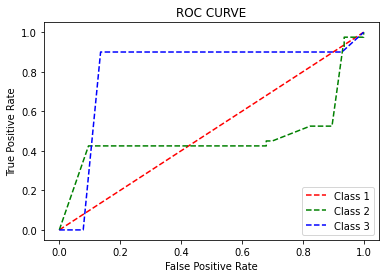

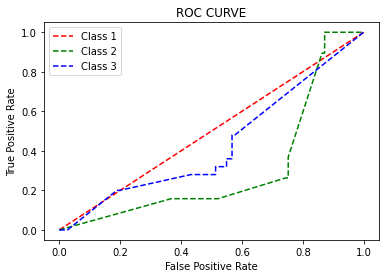

In [ ]:
!pip install -U scikit-multiflow
#install API skmultiflow
#import ExtremelyFastDecisionTreeClassifier from skmultiflow module
from skmultiflow.trees import ExtremelyFastDecisionTreeClassifier

#train DT_C_1 using data_1
DT_C_1 = ExtremelyFastDecisionTreeClassifier(grace_period=12, split_criterion='gini', min_samples_reevaluate=12, binary_split=True)

print(" \n The classifier DT-C-1 : \n")
DT_C_1.partial_fit(X_train.values, Y_train.values)

print(" Performance of DT-C-1 on data_1 test set: \n")
print_metrics_tree(DT_C_1, X_test.values, Y_test.values)

print(" Performance of DT-C-1 on data_2 test set: \n")
print_metrics_tree(DT_C_1, X2_test.values, Y2_test.values)


#DT-C-1 augment the new data data_2 and formulate DT-C-1-X
print(" The classifier DT-C-1-X : \n")
DT_C_1_X= DT_C_1
DT_C_1_X.partial_fit(X2_train.values, Y2_train.values)

print(" Performance of DT-C-1-X on data_1 test set: \n")
print_metrics_tree(DT_C_1_X, X_test.values, Y_test.values)

print(" Performance of DT-C-1-X on data_2 test set: \n")
print_metrics_tree(DT_C_1_X, X2_test.values, Y2_test.values)



##(C) Q2

In [ ]:
from numpy import meshgrid
from numpy import arange

#function to find distance of a sample to the nearest decision boundary of decision tree.
def sample_distance(root,sample_x,y_precticted, model, tree_sturc):
    if tree_sturc.children_left[root]==tree_sturc.children_right[root]:
      if y_precticted != model.predict([sample_x])[0]:
        return [sample_x]  
      else :
        return [None]

    if tree_sturc.threshold[root]<sample_x[tree_sturc.feature[root]]:
        res = sample_distance(tree_sturc.children_right[root],sample_x,y_precticted, model, tree_sturc)
        copy_sample = sample_x.copy()
        copy_sample[tree_sturc.feature[root]] = tree_sturc.threshold[root] 
        modif = sample_distance(tree_sturc.children_left[root],copy_sample,y_precticted, model, tree_sturc)

    else:
        res = sample_distance(tree_sturc.children_left[root],sample_x,y_precticted, model, tree_sturc)
        copy_sample = sample_x.copy()
        copy_sample[tree_sturc.feature[root]] = 1*0.1 + tree_sturc.threshold[root]
        modif = sample_distance(tree_sturc.children_right[root],copy_sample,y_precticted, model, tree_sturc)
    aray = []
    for s in res+modif:
      if s is not None:
        aray.append(s)
    return aray


DT_C_2= clone(estimator=DT_A, safe=True)

# Plot the decision surface boundaries of the DT_A.
def print_decision_boundary(X, Y, feature1, feature2, sample):
    #X containig samples only with 2 features
    X= X_train.values[:, [feature1, feature2]]
    Y= Y_train.values
    #training decision tree
    DT_C_2.fit(X, Y)
    #tree structure of DT
    tree = DT_C_2.tree_

    #To find distance of the given sample to the nearest decision boundary
    res = sample_distance(0,sample,DT_C_2.predict([sample])[0], DT_C_2, tree) 
    ans = np.min([np.linalg.norm(sample-n) for n in res]) 
    print("Distance of the sample to the nearest decision boundary: ", ans, "\n")

    #finding min and max values for each features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #scales of x and y axis
    xa= np.arange(x_min, x_max, 0.02)
    ya= np.arange(y_min, y_max, 0.02)
    #grid for features
    grid_x, grid_y = np.meshgrid(xa, ya)

    #predicting 
    predictions = DT_C_2.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    predictions = predictions.reshape(grid_x.shape)
    cs = plt.contourf(grid_x, grid_y, predictions, cmap=plt.cm.RdYlBu)

    # scatter graph for training data points
    for i, color in zip(range(1,4), "ryb"):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i , cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    #plotting
    plt.xlabel(data1.columns[feature1])
    plt.ylabel(data1.columns[feature2])
    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend()

Distance of the sample to the nearest decision boundary:  4.591568537088732 

Distance of the sample to the nearest decision boundary:  39.45883931389772 

Distance of the sample to the nearest decision boundary:  10.76150546853627 

Distance of the sample to the nearest decision boundary:  26.476404589747453 



<Figure size 432x288 with 0 Axes>

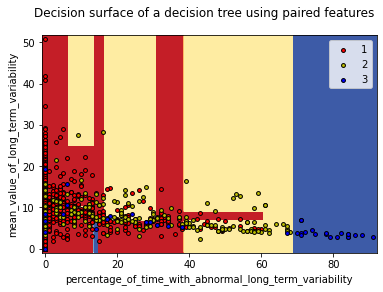

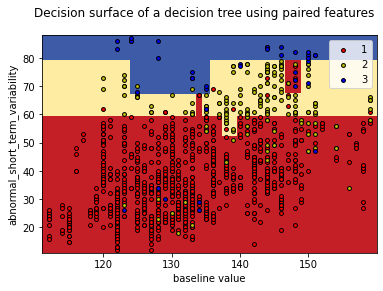

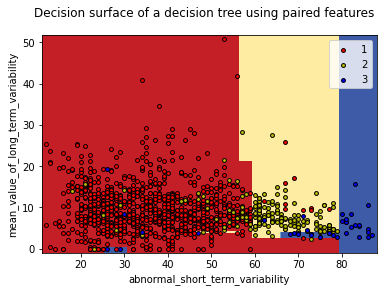

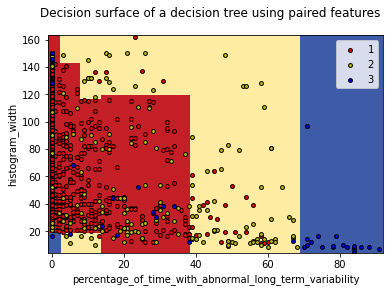

<Figure size 432x288 with 0 Axes>

In [ ]:
print_decision_boundary(X_train, Y_train, 9, 10, np.array([1, 11.4]))
plt.figure()

print_decision_boundary(X_train, Y_train, 0, 7, np.array([130, 24]))
plt.figure()

print_decision_boundary(X_train, Y_train, 7, 10, np.array([19, 8.7]))
plt.figure()

print_decision_boundary(X_train, Y_train, 9, 11, np.array([18, 44]))
plt.figure()

In [ ]:
with open('DT_C_1.pkl', 'wb') as tt:
  pickle.dump(DT_C_1_X, tt)